<a href="https://colab.research.google.com/github/dammy-50/Machine-Learning-Projects/blob/main/Crime_rate_forecasting(time_series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print ('Hello')

Hello


In [2]:
print('Hello world')

Hello world


In [3]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536685 sha256=d7b527ba4ce66367a59af993ef4e4df84b11f69060f5fe07058f7e192a0aba7f
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [6]:
df1=pd.read_csv("/content/drive/MyDrive/datascience/Chicago_Crimes_2005_to_2007.csv",error_bad_lines=False)
df2=pd.read_csv("/content/drive/MyDrive/datascience/Chicago_Crimes_2008_to_2011.csv",error_bad_lines=False)
df3=pd.read_csv("/content/drive/MyDrive/datascience/Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [7]:
df3.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [8]:
df=pd.concat([df1,df2,df3])

In [9]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [10]:
df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


#### **1. Find the shape of the data set using the shape attributes :**


In [11]:
print("Number of rows is",df.shape[0])
print("Number of Columns is",df.shape[1])

Number of rows is 6017767
Number of Columns is 23


#### **2. Get information of dataset with info method**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

#### **3. Check Null values in the Dataset**

In [13]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

#### **4. Drop Unneccesary Columns and create a new Dataset with our important columns**

In [14]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [15]:
dF= df[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [16]:
dF.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


#### **5. Drop Null Values in this new Dataset**

In [17]:
dF.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

In [18]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 241.0+ MB


##### **Let's Convert the Data type of this Date Column to Date-time**


In [19]:
dF.Date = pd.to_datetime(dF.Date,format = '%m/%d/%Y %I:%M:%S %p')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


####  **6. Find The Top 10 Primary Crime Types**

In [21]:
dF.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [22]:
dF['Primary Type'].value_counts().head(10)

THEFT                  1245111
BATTERY                1079178
CRIMINAL DAMAGE         702702
NARCOTICS               674831
BURGLARY                369056
OTHER OFFENSE           368169
ASSAULT                 360244
MOTOR VEHICLE THEFT     271624
ROBBERY                 229467
DECEPTIVE PRACTICE      225180
Name: Primary Type, dtype: int64

#### 7. How many Criminals Are Arrested Having Primary Crime type is Theft?

In [23]:
dF[dF['Primary Type']=='THEFT']['Arrest'].value_counts()

False    1103799
True      141312
Name: Arrest, dtype: int64

#### 8. Find The Top 10 Crime Location Descriptions

In [24]:
dF.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [25]:
dF['Location Description'].value_counts().head(10)

STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: Location Description, dtype: int64

 #### 9. How many are Arrested Having Location type is STREET?

In [26]:
dF[dF['Location Description']=='STREET']['Arrest'].value_counts()

False    1093718
True      424006
Name: Arrest, dtype: int64

#### Let's Set Our Date Columns As the Index of Pandas DataFrame for Visualization

In [27]:
dF.index = pd.DatetimeIndex(dF.Date)

In [28]:
dF

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


#### Now Our Date Column Has Become The Index of Our DataFrame

##### We are interested in YEAR-WISE Distribution

Text(0, 0.5, 'Number of Crimes')

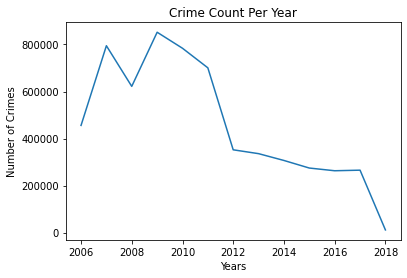

In [29]:
plt.plot(dF.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

#### We are interested in MONTH-WISE Distribution

Text(0, 0.5, 'Number of Crimes')

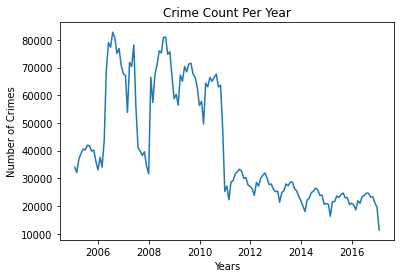

In [30]:
plt.plot(dF.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

#### **Let's perform Forecasting by first preparing the Data**

In [31]:
dF_prophet = pd.DataFrame(dF.resample('M').size().reset_index())
dF_prophet.columns=['Date','Crime Count']
dF_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


#### Let's Rename The Column.Take note that input to FacebookProphet is always ds and y(It must be numerical and must represent the measurements to Forecast)

In [32]:
dF_prophet=dF_prophet.rename(columns={'Date':'ds','Crime Count':'y'})


In [33]:
dF_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


#### Let's Train Our Model For Further Forecasting

In [34]:
C = Prophet()


In [35]:
C.fit(dF_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Let's Make Predictions Using Our Trained MODEL

In [36]:
# to Forecast for 24 monhs and Frequency to Months
pred = C.make_future_dataframe(periods=24,freq='M')
C.predict(pred)
forcast =C.predict(pred)

In [37]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60204.700893,38837.512579,71884.128088,60204.700893,60204.700893,-5158.564764,-5158.564764,-5158.564764,-5158.564764,-5158.564764,-5158.564764,0.0,0.0,0.0,55046.136129
1,2005-02-28,60077.285054,34542.993796,68071.386338,60077.285054,60077.285054,-9560.477505,-9560.477505,-9560.477505,-9560.477505,-9560.477505,-9560.477505,0.0,0.0,0.0,50516.807549
2,2005-03-31,59936.217519,41547.218300,75550.113035,59936.217519,59936.217519,-1354.653670,-1354.653670,-1354.653670,-1354.653670,-1354.653670,-1354.653670,0.0,0.0,0.0,58581.563849
3,2005-04-30,59799.700549,45100.419055,77924.592735,59799.700549,59799.700549,1101.993151,1101.993151,1101.993151,1101.993151,1101.993151,1101.993151,0.0,0.0,0.0,60901.693700
4,2005-05-31,59658.633013,48268.747913,81054.717941,59658.633013,59658.633013,5398.409108,5398.409108,5398.409108,5398.409108,5398.409108,5398.409108,0.0,0.0,0.0,65057.042121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6521.104616,-7744.220137,25682.821692,6160.751373,6899.486762,1810.337675,1810.337675,1810.337675,1810.337675,1810.337675,1810.337675,0.0,0.0,0.0,8331.442291
165,2018-10-31,6107.912768,-6911.724175,25509.956925,5721.487592,6517.890419,2310.560266,2310.560266,2310.560266,2310.560266,2310.560266,2310.560266,0.0,0.0,0.0,8418.473034
166,2018-11-30,5708.049689,-13468.449167,21018.005448,5292.845268,6149.471916,-2174.139317,-2174.139317,-2174.139317,-2174.139317,-2174.139317,-2174.139317,0.0,0.0,0.0,3533.910372
167,2018-12-31,5294.857841,-16698.656183,16513.827483,4851.678553,5764.657937,-6159.893588,-6159.893588,-6159.893588,-6159.893588,-6159.893588,-6159.893588,0.0,0.0,0.0,-865.035748


#### As we can see,facebook prophet has generated this DataFrame.So let's visualize it

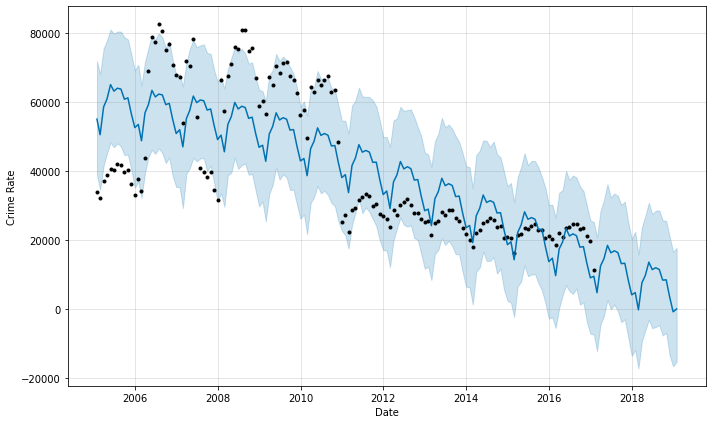

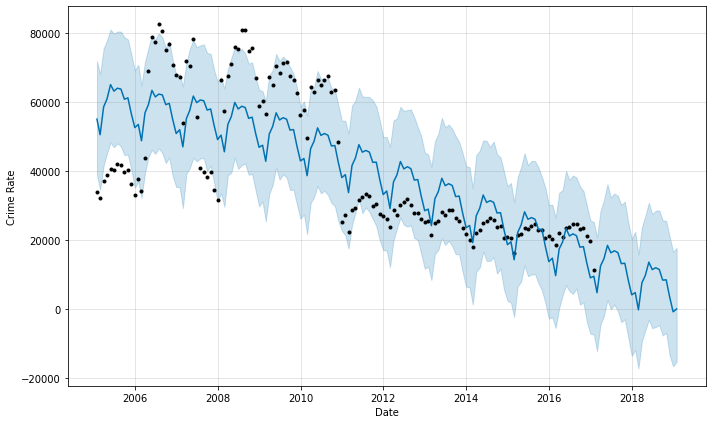

In [38]:
C.plot(forcast,xlabel='Date',ylabel='Crime Rate')

#### From our plots,the black dots are historical data ,the blue line is the model prediction and the light blue patch is the 95% confidence intervals around predictions. So the forcast for 2019 is decreasing as per our plot

#### Let's save our mode with json library.Training isnt required.

In [39]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(C), fout)  # Save model

In [40]:
with open('prophet_model.json', 'r') as fin:
    C1 = model_from_json(json.load(fin))  # Load model

In [41]:
x = int(input("Enter Numbers Months to forecast"))


Enter Numbers Months to forecast20


In [42]:
pred = C1.make_future_dataframe(periods=x ,freq = "M")
forcast = C1.predict(pred)

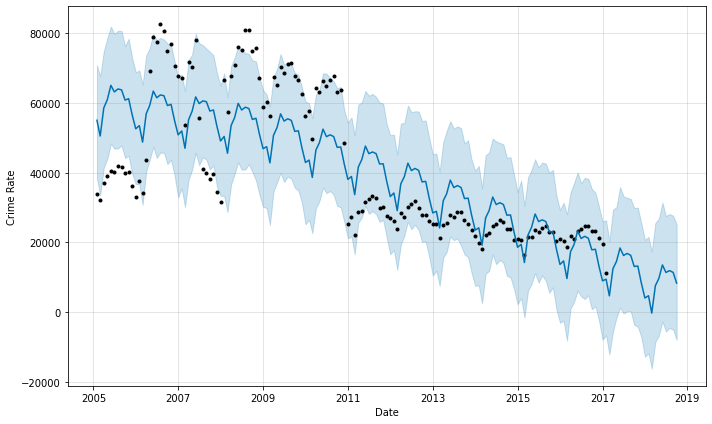

In [43]:
figure = C1.plot(forcast, xlabel='Date', ylabel='Crime Rate')